<a href="https://colab.research.google.com/github/ruchou/DeepLearningFromGoogleColab/blob/master/overfitting_and_underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [0]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

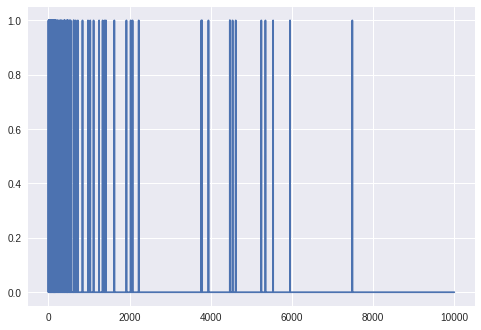

In [4]:
plt.plot(train_data[0])

In [9]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works. 
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    
])

baseline_model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))


baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [10]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
 - 3s - loss: 0.5065 - acc: 0.7933 - binary_crossentropy: 0.5065 - val_loss: 0.3519 - val_acc: 0.8745 - val_binary_crossentropy: 0.3519
Epoch 2/20
 - 3s - loss: 0.2588 - acc: 0.9104 - binary_crossentropy: 0.2588 - val_loss: 0.2870 - val_acc: 0.8880 - val_binary_crossentropy: 0.2870
Epoch 3/20
 - 3s - loss: 0.1868 - acc: 0.9348 - binary_crossentropy: 0.1868 - val_loss: 0.2894 - val_acc: 0.8851 - val_binary_crossentropy: 0.2894
Epoch 4/20
 - 3s - loss: 0.1510 - acc: 0.9484 - binary_crossentropy: 0.1510 - val_loss: 0.3148 - val_acc: 0.8768 - val_binary_crossentropy: 0.3148
Epoch 5/20
 - 3s - loss: 0.1242 - acc: 0.9589 - binary_crossentropy: 0.1242 - val_loss: 0.3311 - val_acc: 0.8752 - val_binary_crossentropy: 0.3311
Epoch 6/20
 - 3s - loss: 0.1031 - acc: 0.9688 - binary_crossentropy: 0.1031 - val_loss: 0.3582 - val_acc: 0.8710 - val_binary_crossentropy: 0.3582
Epoch 7/20
 - 3s - l

In [11]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 4)                 40004     
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [12]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.6029 - acc: 0.6669 - binary_crossentropy: 0.6029 - val_loss: 0.5391 - val_acc: 0.8097 - val_binary_crossentropy: 0.5391
Epoch 2/20
 - 3s - loss: 0.4840 - acc: 0.8480 - binary_crossentropy: 0.4840 - val_loss: 0.4875 - val_acc: 0.8549 - val_binary_crossentropy: 0.4875
Epoch 3/20
 - 3s - loss: 0.4329 - acc: 0.8978 - binary_crossentropy: 0.4329 - val_loss: 0.4661 - val_acc: 0.8668 - val_binary_crossentropy: 0.4661
Epoch 4/20
 - 3s - loss: 0.3979 - acc: 0.9220 - binary_crossentropy: 0.3979 - val_loss: 0.4533 - val_acc: 0.8751 - val_binary_crossentropy: 0.4533
Epoch 5/20
 - 3s - loss: 0.3699 - acc: 0.9393 - binary_crossentropy: 0.3699 - val_loss: 0.4474 - val_acc: 0.8750 - val_binary_crossentropy: 0.4474
Epoch 6/20
 - 3s - loss: 0.3461 - acc: 0.9515 - binary_crossentropy: 0.3461 - val_loss: 0.4503 - val_acc: 0.8710 - val_binary_crossentropy: 0.4503
Epoch 7/20
 - 3s - loss: 0.3246 - acc: 0.9612 - binary_crossentropy:

In [13]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               5120512   
_________________________________________________________________
dense_19 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [14]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.3417 - acc: 0.8564 - binary_crossentropy: 0.3417 - val_loss: 0.3006 - val_acc: 0.8767 - val_binary_crossentropy: 0.3006
Epoch 2/20
 - 4s - loss: 0.1400 - acc: 0.9496 - binary_crossentropy: 0.1400 - val_loss: 0.3338 - val_acc: 0.8725 - val_binary_crossentropy: 0.3338
Epoch 3/20
 - 4s - loss: 0.0431 - acc: 0.9880 - binary_crossentropy: 0.0431 - val_loss: 0.4515 - val_acc: 0.8692 - val_binary_crossentropy: 0.4515
Epoch 4/20
 - 4s - loss: 0.0066 - acc: 0.9989 - binary_crossentropy: 0.0066 - val_loss: 0.5947 - val_acc: 0.8686 - val_binary_crossentropy: 0.5947
Epoch 5/20
 - 4s - loss: 0.0011 - acc: 1.0000 - binary_crossentropy: 0.0011 - val_loss: 0.6840 - val_acc: 0.8688 - val_binary_crossentropy: 0.6840
Epoch 6/20
 - 4s - loss: 3.1063e-04 - acc: 1.0000 - binary_crossentropy: 3.1063e-04 - val_loss: 0.7196 - val_acc: 0.8705 - val_binary_crossentropy: 0.7196
Epoch 7/20
 - 4s - loss: 2.4598e-04 - acc: 1.0000 - binary_c

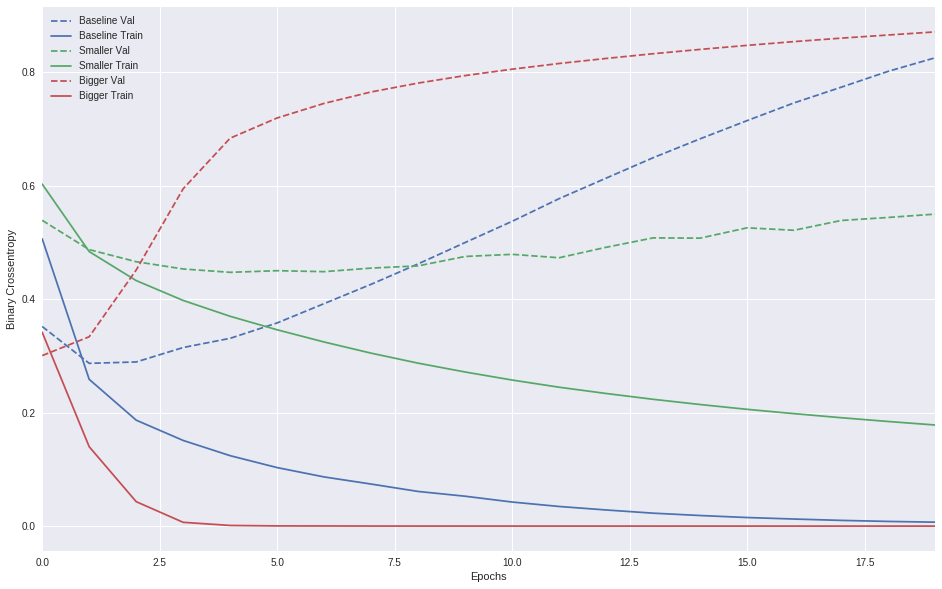

In [15]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [0]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

In [16]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.5159 - acc: 0.8036 - binary_crossentropy: 0.4774 - val_loss: 0.3692 - val_acc: 0.8777 - val_binary_crossentropy: 0.3298
Epoch 2/20
 - 3s - loss: 0.2929 - acc: 0.9099 - binary_crossentropy: 0.2500 - val_loss: 0.3308 - val_acc: 0.8877 - val_binary_crossentropy: 0.2851
Epoch 3/20
 - 3s - loss: 0.2413 - acc: 0.9314 - binary_crossentropy: 0.1932 - val_loss: 0.3353 - val_acc: 0.8841 - val_binary_crossentropy: 0.2855
Epoch 4/20
 - 3s - loss: 0.2199 - acc: 0.9419 - binary_crossentropy: 0.1683 - val_loss: 0.3546 - val_acc: 0.8787 - val_binary_crossentropy: 0.3016
Epoch 5/20
 - 3s - loss: 0.2042 - acc: 0.9494 - binary_crossentropy: 0.1500 - val_loss: 0.3664 - val_acc: 0.8772 - val_binary_crossentropy: 0.3112
Epoch 6/20
 - 3s - loss: 0.1926 - acc: 0.9554 - binary_crossentropy: 0.1365 - val_loss: 0.3794 - val_acc: 0.8745 - val_binary_crossentropy: 0.3227
Epoch 7/20
 - 3s - loss: 0.1855 - acc: 0.9586 - binary_crossentropy:

In [0]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [17]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.6229 - acc: 0.6512 - binary_crossentropy: 0.6229 - val_loss: 0.4946 - val_acc: 0.8495 - val_binary_crossentropy: 0.4946
Epoch 2/20
 - 3s - loss: 0.4582 - acc: 0.8174 - binary_crossentropy: 0.4582 - val_loss: 0.3552 - val_acc: 0.8806 - val_binary_crossentropy: 0.3552
Epoch 3/20
 - 3s - loss: 0.3648 - acc: 0.8704 - binary_crossentropy: 0.3648 - val_loss: 0.3041 - val_acc: 0.8881 - val_binary_crossentropy: 0.3041
Epoch 4/20
 - 3s - loss: 0.3000 - acc: 0.8984 - binary_crossentropy: 0.3000 - val_loss: 0.2881 - val_acc: 0.8892 - val_binary_crossentropy: 0.2881
Epoch 5/20
 - 3s - loss: 0.2604 - acc: 0.9196 - binary_crossentropy: 0.2604 - val_loss: 0.2822 - val_acc: 0.8883 - val_binary_crossentropy: 0.2822
Epoch 6/20
 - 3s - loss: 0.2286 - acc: 0.9304 - binary_crossentropy: 0.2286 - val_loss: 0.2934 - val

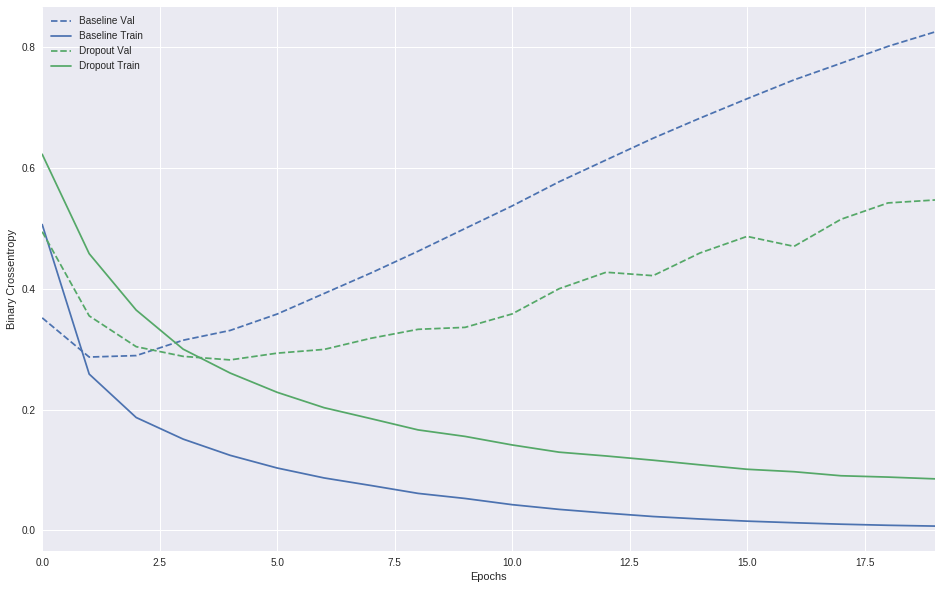

In [18]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])